In [0]:
import networkx as nx
import matplotlib.pyplot as plt

from graphframes import GraphFrame

In [0]:
def plot_graph(gf):
  
  gplot = nx.DiGraph()
  edge_labels = {}
  
  plt.figure(figsize=(5, 5))
  for node in gf.vertices.select('id').take(1000):
    gplot.add_node(node['id'])
 
  for row in gf.edges.select('src', 'dst', 'distance').take(1000):
    gplot.add_edge(row['src'], row['dst'])
    edge_labels[(row['src'], row['dst'])] = row['distance']
       
  pos = nx.shell_layout(gplot)
  
  nx.draw(gplot,
          pos,
          with_labels=True, 
          font_weight='bold', 
          node_size=1800, 
          font_size=15, 
          width=2)
    
  nx.draw_networkx_edge_labels(gplot,
                               pos,
                               edge_labels=edge_labels,
                               font_color='green',
                               font_size=10,
                               font_weight='bold')

In [0]:
vertices = spark.createDataFrame([("BLR", "Bangalore", 20),
                                  ("MUM", "Mumbai", 25),
                                  ("AHM", "Ahmedabad", 4),
                                  ("CHN", "Chennai", 21)], ["id", "city", "population"])

In [0]:
edges = spark.createDataFrame([("BLR", "MUM", 2000),
                               ("MUM", "AHM", 800),
                               ("AHM", "CHN", 2300)], ["src", "dst", "distance"])

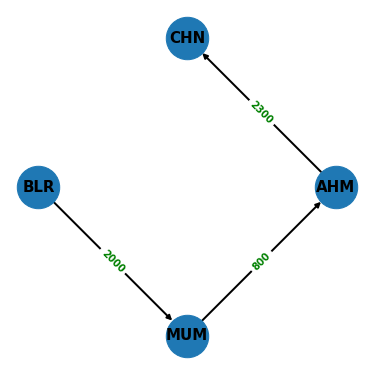

In [0]:
# note that graph below doesn't include triangles (there is no route to get back to any of cities)
cities = GraphFrame(vertices, edges)

plot_graph(cities)

In [0]:
tri_count = cities.triangleCount()
 
display(tri_count)

count,id,city,population
0,BLR,Bangalore,20
0,MUM,Mumbai,25
0,AHM,Ahmedabad,4
0,CHN,Chennai,21


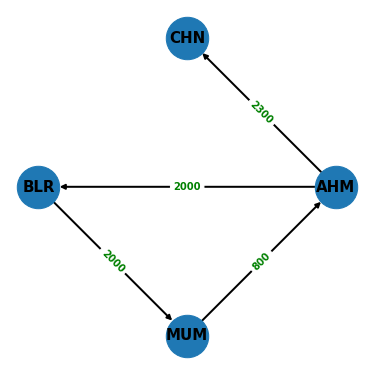

In [0]:
# now let's make chandes to the graph, such that now it will have 4 edges
edges = spark.createDataFrame([("BLR", "MUM", 2000),
                               ("MUM", "AHM", 800),
                               ("AHM", "BLR", 2000),
                               ("AHM", "CHN", 2300)], ["src", "dst", "distance"])

cities = GraphFrame(vertices, edges)

plot_graph(cities)

In [0]:
tri_count = cities.triangleCount()
 
display(tri_count)

count,id,city,population
1,BLR,Bangalore,20
1,MUM,Mumbai,25
1,AHM,Ahmedabad,4
0,CHN,Chennai,21


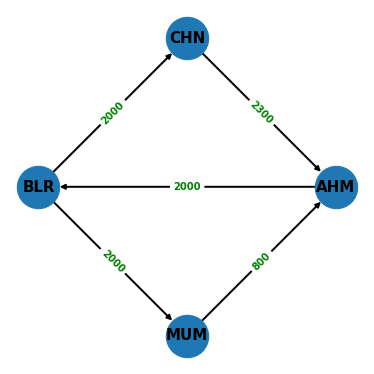

In [0]:
# another changes to graph edges
edges = spark.createDataFrame([("BLR", "MUM", 2000),
                               ("MUM", "AHM", 800),
                               ("AHM", "BLR", 2000),
                               ("BLR", "CHN", 2000),
                               ("CHN", "AHM", 2300)], ["src", "dst", "distance"])

cities = GraphFrame(vertices, edges)

plot_graph(cities)

In [0]:
tri_count = cities.triangleCount()
 
display(tri_count)

count,id,city,population
2,BLR,Bangalore,20
1,MUM,Mumbai,25
2,AHM,Ahmedabad,4
1,CHN,Chennai,21
